In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import time
import ilrma, util

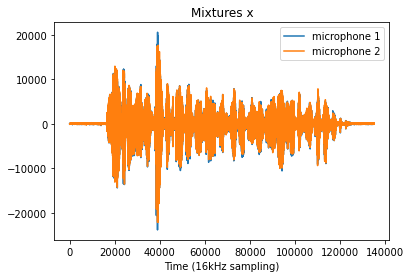

In [2]:
sampling_rate, x = wavfile.read('sources/mixture2sources1_16k.wav')
plt.plot(x)
plt.title('Mixtures x')
plt.legend(('microphone 1', 'microphone 2'))
plt.xlabel('Time (16kHz sampling)')
plt.savefig('x.png')

In [3]:
#### STFT
fftSize = 2048
frameShift = 512
X = util.stftTensor(x, fftSize, frameShift) # (nMic,nFreq,nTime)

In [4]:
# ILRMA
nLoop = 50
nSig = 2
start_time = time.time()
bss = ilrma.ILRMA(X, nSig)
bss.optimization(nLoop)
YA = bss.scaled_separated_signals()
y = util.istftTensor(YA, fftSize, frameShift)
print(f'elapsed time = {time.time()-start_time}')
util.waveout(y, 'y')

elapsed time = 5.291292428970337


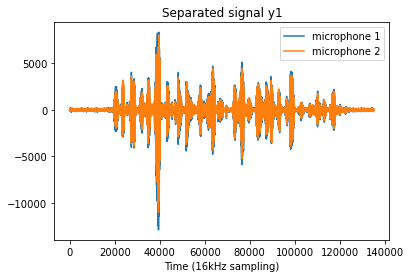

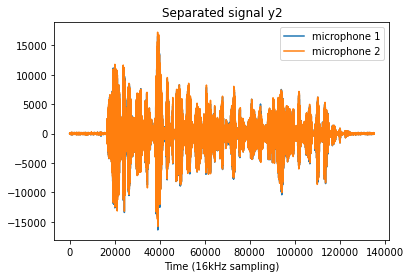

In [5]:
for i in range(nSig):
    plt.figure()
    plt.plot(y[i])
    plt.title(f'Separated signal y{i+1}')
    plt.legend(('microphone 1', 'microphone 2'))
    plt.xlabel('Time (16kHz sampling)')
    plt.savefig(f'y{i+1}.png')

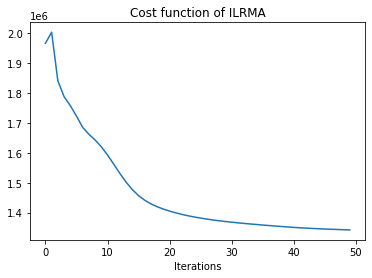

In [6]:
plt.plot(bss.losshist)
plt.title('Cost function of ILRMA')
plt.xlabel('Iterations')
plt.savefig('costfunc.png')